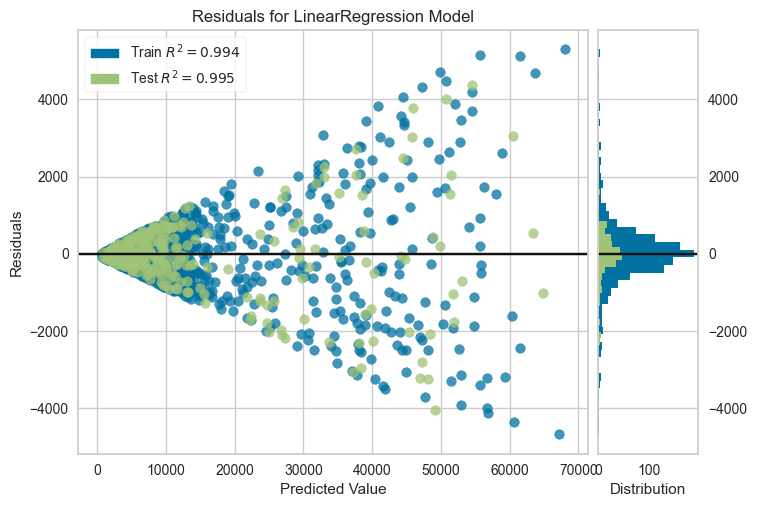

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [11]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd

# Load the dataset
file_path = 'ship_fuel_efficiency_numeric.csv'
data = pd.read_csv(file_path)  

# Now 'data' is the DataFrame containing your dataset

# Prepare the data (for example, predict CO2 emissions based on fuel consumption)
X = data[['fuel_consumption']]  # Independent variable from the dataset
y = data['CO2_emissions']       # Dependent variable from the dataset

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Visualize residuals using Yellowbrick
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the model with training data
visualizer.score(X_test, y_test)  # Score the model with test data
visualizer.show()  # Display the residuals plot


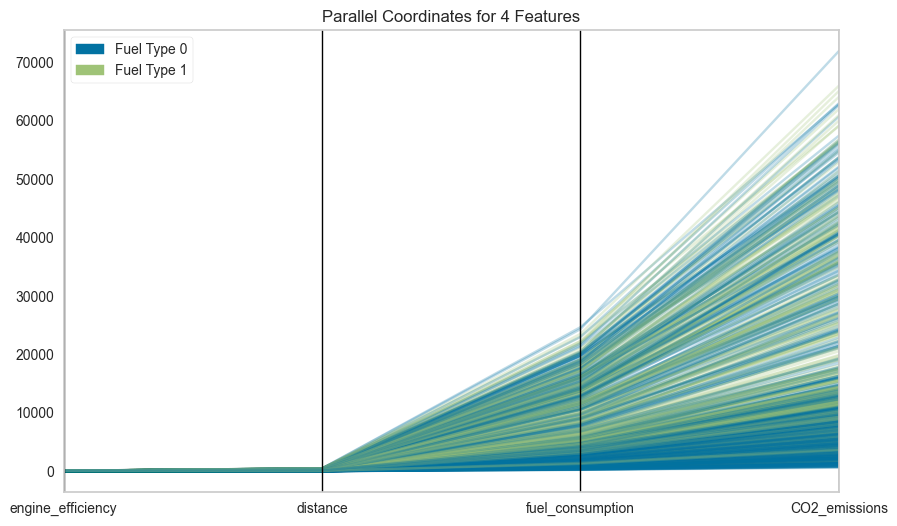

<Axes: title={'center': 'Parallel Coordinates for 4 Features'}>

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.features import ParallelCoordinates

# Load the dataset
file_path = 'ship_fuel_efficiency_numeric.csv'
df = pd.read_csv(file_path)

# Create a new column for fuel_type labels (0 and 1)
df['fuel_type_label'] = df['fuel_type'].map({0: 'Fuel Type 0', 1: 'Fuel Type 1'})

# Define X and y
X = df[['engine_efficiency', 'distance', 'fuel_consumption', 'CO2_emissions']]  # Features
y = df['fuel_type_label']  # Target variable

# Use Yellowbrick's ParallelCoordinates visualizer
plt.figure(figsize=(10, 6))
visualizer = ParallelCoordinates(classes=['Fuel Type 0', 'Fuel Type 1'])
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()


What it shows:
The lines for both fuel types tend to increase as we move from left to right, especially for fuel_consumption and CO2_emissions.
If the lines of each fuel type follow similar patterns across features, it suggests that both fuel types behave similarly in terms of these features.
The large number of lines that are close together indicates that most data points for each fuel type share similar values for the features being compared.

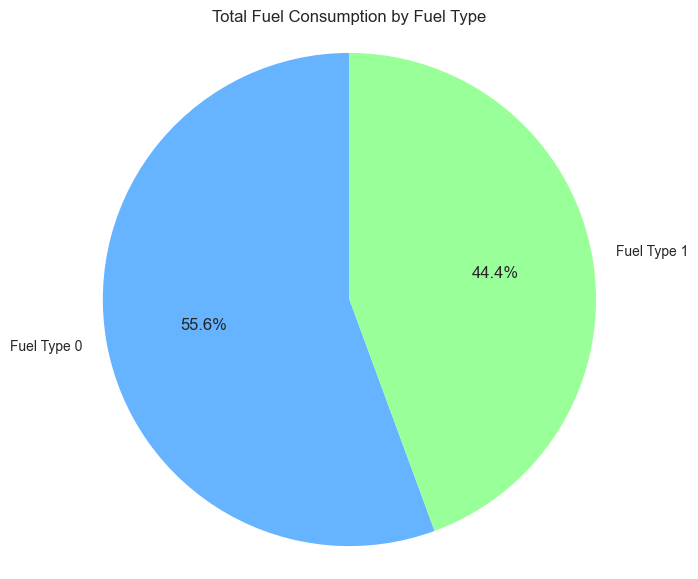

In [ ]:

# Calculate total fuel consumption for each fuel type
total_fuel_type_0 = df[df['fuel_type'] == 0]['fuel_consumption'].sum()
total_fuel_type_1 = df[df['fuel_type'] == 1]['fuel_consumption'].sum()

total_fuel_type_0, total_fuel_type_1

# Visualization
# Data for the pie chart
labels = ['Fuel Type 0', 'Fuel Type 1']
sizes = [total_fuel_type_0, total_fuel_type_1]

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Total Fuel Consumption by Fuel Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Here is a pie chart showing the total fuel consumption by fuel type. As you can see, Fuel Type 0 (Diesel) makes up 55.6% of the total fuel consumption, while Fuel Type 1 (HFO) accounts for 44.4%